In [1]:
# importing the required libraries

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# defining function to find best parameters for the ARIMA model

def best_model(data) :
    
    # splitting the data for training and test 80%-20%
    train_size = int(len(data)*0.8)
    train_data = data[:train_size]
    test_data = data[train_size:]
    
    # defing the grid parameters with values and running a grid search to find best parameters
    vals = [(i,j,k) for i in range(3) for j in range(1,3) for k in range(3)]
    mse = 10000000
    best_vals = (0,1,0)
    best_preds = []
    for val in vals :
        history = [x for x in train_data]
        predictions = []
        try :
            arima = ARIMA(history,val)
            model = arima.fit()
            for i in range(len(test_data)) :
                arima = ARIMA(history,val)
                model = arima.fit()
                predictions.append(model.forecast()[0])
                history.append(test_data.iloc[i])
            if mean_squared_error(predictions,test_data) < mse :
                mse = mean_squared_error(predictions,test_data)
                best_vals = val
                best_preds = predictions
        except :
            pass
    return(best_vals,mse,best_preds)



# defining function to predict forecasts and plotting the test data for the given stocks

def forecast_all(data):
    for column in data.columns :
        forecast_stock =  best_model(data[column])
        print('For the Stock %s, best parameters are p=%d d=%d q=%d and MSE is %.4f'
              %(column,forecast_stock[0][0],forecast_stock[0][1],forecast_stock[0][2],forecast_stock[1]))
        plt.plot(forecast_stock[2],'c-')
        plt.plot(data[column].iloc[int(len(data)*0.8):].values,'k--')
        plt.legend(['Predicted Values','TestData'])
        plt.title('Predicted Values on Test Data for %s Stock'%column)
        plt.show()

For the Stock NASDAQ.AAPL, best parameters are p=2 d=1 q=1 and MSE is 0.0023


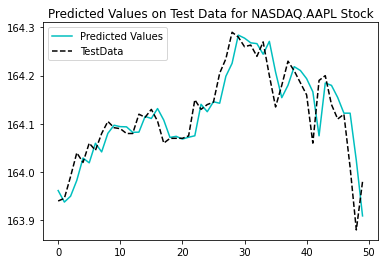

For the Stock NASDAQ.ADP, best parameters are p=0 d=1 q=0 and MSE is 0.0014


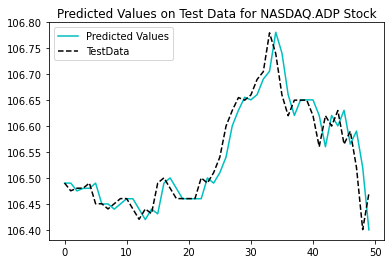

For the Stock NASDAQ.CBOE, best parameters are p=2 d=1 q=2 and MSE is 0.0008


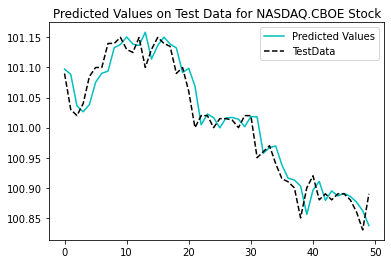

For the Stock NASDAQ.CSCO, best parameters are p=0 d=1 q=0 and MSE is 0.0002


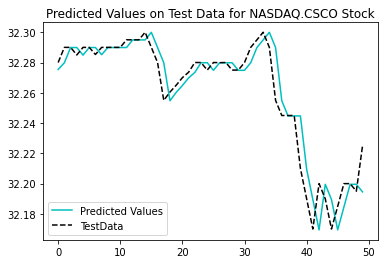

For the Stock NASDAQ.EBAY, best parameters are p=2 d=2 q=0 and MSE is 0.0002


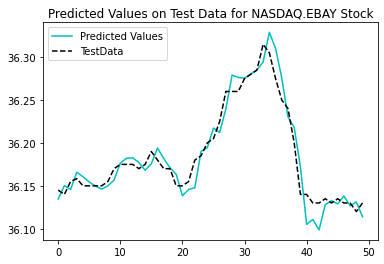

In [3]:
# reading the data and forecasting for the given stocks

warnings.filterwarnings("ignore")
data = pd.read_csv('data_stocks.csv')
forecast_all(data[['NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']].iloc[-250:])

In the above cell only last 250 data is taken for the sake of ruducing time complexity of model. If we want to train on whole dataset then just remove ".iloc[-250:]" from the 5th line of above cell.